In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pyarrow import parquet as pq
import pyarrow as pa
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

Data Exploration
To-Do:
    1. Explore data structue
    2. Standard Time Series Test
    3. Export Training Data as Example Generator

# Data Structure

* There are five categorical data including item id, department id, store id, state id
* All the categorical data is represented as string
* There are more data in CA than two other states
* Data number is evenly distributed in all the store
* There are 3, 2, and 2 dep for food, household, and hobby department
* Food 3 has the largest number of items, while hobby 2 has the least.

In [3]:
train_val = pd.read_csv('../Data/Train/sales_train_validation.csv')
sell_prices = pd.read_csv('../Data/Train/sell_prices.csv')
calendar = pd.read_csv('../Data/Train/calendar.csv')
print(train_val.info())
print(train_val.dtypes)
print(train_val.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None
id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
state_id    object
d_1          int64
d_2          int64
d_3          int64
d_4          int64
d_5          int64
d_6          int64
d_7          int64
d_8          int64
d_9          int64
d_10         int64
d_11         int64
d_12         int64
d_13         int64
d_14         int64
d_15         int64
d_16         int64
d_17         int64
d_18         int64
d_19         int64
d_20         int64
d_21         int64
d_22         int64
d_23         int64
d_24         int64
             ...  
d_1884       int64
d_1885       int64
d_1886       int64
d_1887       int64
d_1888       int64
d_1889       int64
d_1890       int64
d_1891       int64
d_1892       int64
d_1893       int64
d_1894       int64
d_1895       int64
d_1896     

In [3]:
print('dept_id')
print(train_val.dept_id.value_counts())
print('cat_id')
print(train_val.cat_id.value_counts())
print('store_id')
print(train_val.store_id.value_counts())
print('state_id')
print(train_val.state_id.value_counts())
print(train_val[['item_id','dept_id','cat_id','store_id','state_id']].head())

dept_id
FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64
cat_id
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64
store_id
CA_3    3049
CA_4    3049
TX_3    3049
WI_3    3049
TX_1    3049
CA_1    3049
CA_2    3049
WI_2    3049
TX_2    3049
WI_1    3049
Name: store_id, dtype: int64
state_id
CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64
         item_id    dept_id   cat_id store_id state_id
0  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1       CA
1  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1       CA
2  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1       CA
3  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1       CA
4  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1       CA


In [4]:
train_val.groupby(['dept_id']).item_id.nunique()

dept_id
FOODS_1        216
FOODS_2        398
FOODS_3        823
HOBBIES_1      416
HOBBIES_2      149
HOUSEHOLD_1    532
HOUSEHOLD_2    515
Name: item_id, dtype: int64

In [4]:
print(sell_prices.info())
print(sell_prices.head())
print(calendar.info())
print(calendar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2 

In [4]:
cate_info = sell_prices.merge(calendar,how = 'left' ,on = 'wm_yr_wk')
cate_info.head()

,store_id,item_id,wm_yr_wk,sell_price,date,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,CA_1,HOBBIES_1_001,11325,9.58,2013-07-13,Saturday,1,7,2013,d_897,NaN,NaN,NaN,NaN,0,1,0
1,CA_1,HOBBIES_1_001,11325,9.58,2013-07-14,Sunday,2,7,2013,d_898,NaN,NaN,NaN,NaN,0,0,1
2,CA_1,HOBBIES_1_001,11325,9.58,2013-07-15,Monday,3,7,2013,d_899,NaN,NaN,NaN,NaN,0,1,1
3,CA_1,HOBBIES_1_001,11325,9.58,2013-07-16,Tuesday,4,7,2013,d_900,NaN,NaN,NaN,NaN,0,0,0
4,CA_1,HOBBIES_1_001,11325,9.58,2013-07-17,Wednesday,5,7,2013,d_901,NaN,NaN,NaN,NaN,0,0,0


In [5]:
cate_info.shape

(47735397, 17)

In [6]:
table = pa.Table.from_pandas(cate_info)
pq.write_to_dataset(table,'../Data/Train/cate_info_merge.parquet',partition_cols=['item_id','store_id'])

# Statistical Test

* Across every department, there is no clear autocorrelation. All ADF Test are fail to reject.
* There is no clear seasonality for period of 7 or 1.
* Food 1, Food 3, Household 1, and Household 2 have relatively strong relationship.

## Pearson correlation

In [8]:
dept_mean = train_val.drop(['id','item_id','cat_id','state_id','store_id'],axis =1).groupby('dept_id').mean().transpose()
corrMx_dept = dept_mean.corr()
print(corrMx_dept.stack().sort_values())

dept_id      dept_id    
FOODS_3      HOBBIES_2      0.250975
HOBBIES_2    FOODS_3        0.250975
             FOODS_1        0.435849
FOODS_1      HOBBIES_2      0.435849
HOBBIES_1    HOBBIES_2      0.455323
HOBBIES_2    HOBBIES_1      0.455323
             HOUSEHOLD_2    0.493577
HOUSEHOLD_2  HOBBIES_2      0.493577
FOODS_2      HOBBIES_2      0.509702
HOBBIES_2    FOODS_2        0.509702
FOODS_1      FOODS_2        0.513642
FOODS_2      FOODS_1        0.513642
HOUSEHOLD_1  HOBBIES_2      0.535971
HOBBIES_2    HOUSEHOLD_1    0.535971
HOBBIES_1    FOODS_1        0.573510
FOODS_1      HOBBIES_1      0.573510
HOBBIES_1    FOODS_2        0.587061
FOODS_2      HOBBIES_1      0.587061
FOODS_3      HOBBIES_1      0.588649
HOBBIES_1    FOODS_3        0.588649
FOODS_3      FOODS_2        0.627920
FOODS_2      FOODS_3        0.627920
HOUSEHOLD_2  FOODS_2        0.665135
FOODS_2      HOUSEHOLD_2    0.665135
HOUSEHOLD_2  FOODS_1        0.669463
FOODS_1      HOUSEHOLD_2    0.669463
FOODS_2      

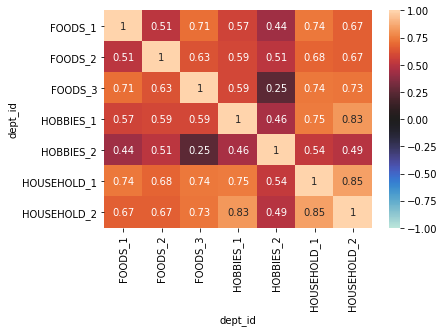

In [9]:
sns.heatmap(corrMx_dept, annot = True, vmin=-1, vmax=1, center= 0)

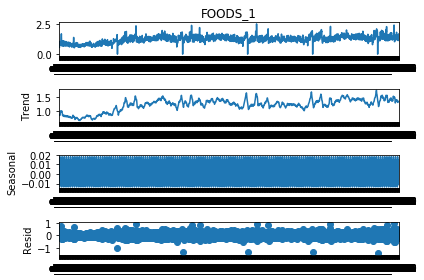

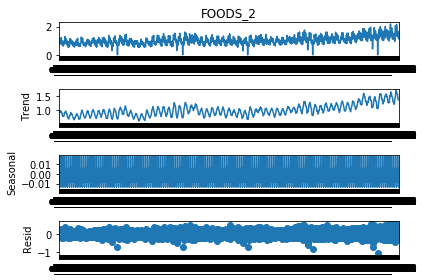

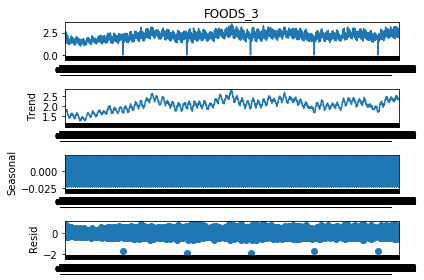

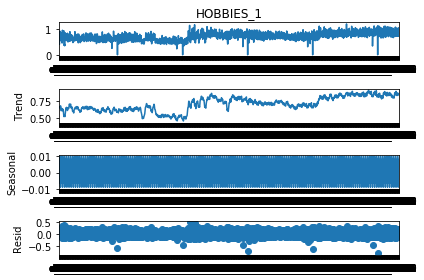

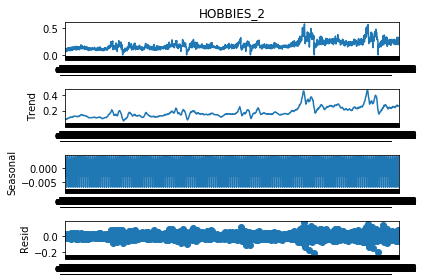

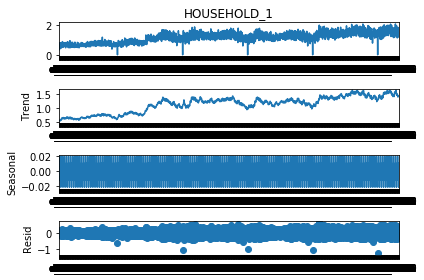

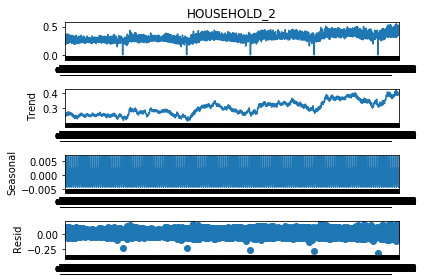

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
for i in dept_mean.columns:
    result = seasonal_decompose(dept_mean[i], model='additive', period=12)
    result.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
for i in dept_mean.columns:
    adf = adfuller(dept_mean[i].values)
    print(f"{i}|adf {adf[0]}|p {i[1]}")

FOODS_1|adf -2.760110441519359|p O
FOODS_2|adf -0.7147661951296058|p O
FOODS_3|adf -2.143930713163598|p O
HOBBIES_1|adf -2.005808196743436|p O
HOBBIES_2|adf -3.1633796852925706|p O
HOUSEHOLD_1|adf -1.7681341666849613|p O
HOUSEHOLD_2|adf -1.4287891543316802|p O


# Generator